<a href="https://colab.research.google.com/github/MatheusMataBIO/Projetos-de-ciencias-de-dados-/blob/main/C%C3%A1lculo_de_M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo de Métricas de Avaliação de Aprendizado**


Autor: Matheus Mata

Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados para Machine Learning, como a acurácia, sensibilidade (recall), especificidade, precisão e  F-score.

In [5]:
!pip install scikit-plot

In [6]:
# Importando as bibliotecas necessárias

from tensorflow.keras import datasets, layers, models
import keras.api._v2.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

import scikitplot as skplt
import matplotlib.pyplot as plt

In [9]:
%load_ext tensorboard

In [10]:
logdir='log'

In [11]:
# Treinamento e tratamento das imagens

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [12]:
# Camadas do modelo convolucional

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [14]:
# Compilação e início do treinamento

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1485 - accuracy: 0.9554 - val_loss: 0.0433 - val_accuracy: 0.9860
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0338 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0283 - val_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0266 - val_accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0300 - val_accuracy: 0.9903


In [19]:
y_true=test_labels

y_pred=model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 2s 6ms/step


In [20]:
classes=[0,1,2,3,4,5,6,7,8,9]


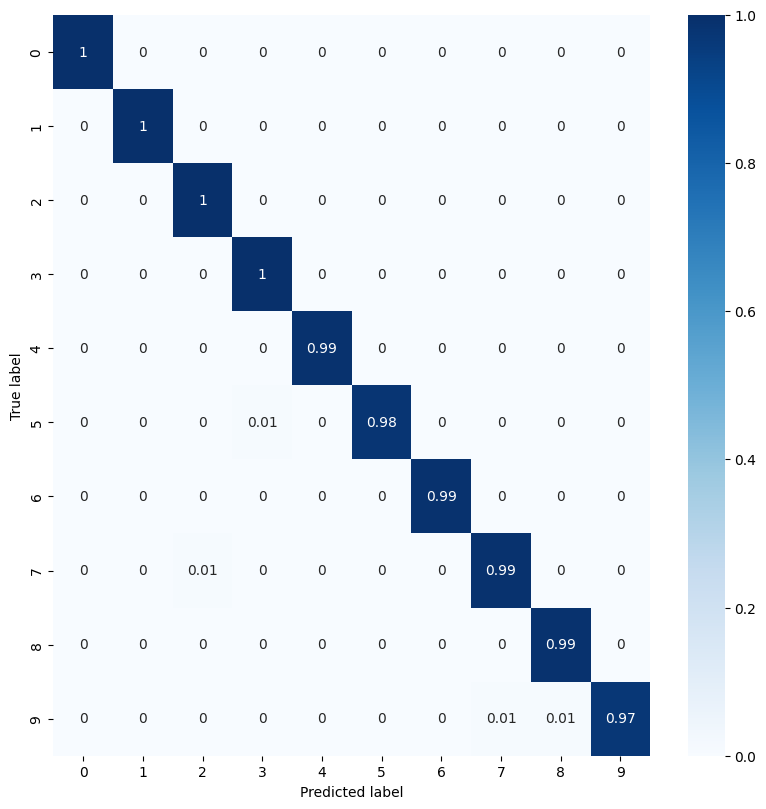

In [21]:
# Gerando a matriz de confusão

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:


# Cálculo ds métricas

FP = con_mat.sum(axis=0) - np.diag(con_mat)
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)
total_itens = 10000

acuracia =  (VP + VN)/(FP + FN + VP + VN)
sensibilidade = VP/(VP+FN)
especificidade = VN/(VN+FP)
precisao = VP/(VP+FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)


print("Falsos Positivos: ", FP)
print("Falsos Negativos: ", FN)
print("Verdadeiros Positivos: ", VP)
print("Verdadeiros Negativos: ", VN)
print ("\nAcuracia: ", acuracia)
print ("\nSensibilidade: ", sensibilidade)
print ("\nEspecificidade: ", especificidade)
print ("\nPrecisão: ", precisao)
print ("\nf_score: ", f_score)

Falsos Positivos:  [12  8 17 12  6  8  4 11 12  7]
Falsos Negativos:  [ 4  2  2  5  5 14  8 13 14 30]
Verdadeiros Positivos:  [ 976 1133 1030 1005  977  878  950 1015  960  979]
Verdadeiros Negativos:  [9008 8857 8951 8978 9012 9100 9038 8961 9014 8984]

Acuracia:  [0.9984 0.999  0.9981 0.9983 0.9989 0.9978 0.9988 0.9976 0.9974 0.9963]

Sensibilidade:  [0.99591837 0.99823789 0.99806202 0.9950495  0.99490835 0.98430493
 0.99164927 0.98735409 0.98562628 0.97026759]

Especificidade:  [0.99866962 0.99909757 0.99810437 0.99866518 0.99933466 0.99912165
 0.99955762 0.99877396 0.99867051 0.99922144]

Precisão:  [0.98785425 0.99298861 0.98376313 0.98820059 0.99389624 0.99097065
 0.99580713 0.98927875 0.98765432 0.99290061]

f_score:  [0.99186992 0.99560633 0.99086099 0.99161322 0.99440204 0.98762655
 0.99372385 0.98831548 0.98663926 0.98145363]
